In [24]:
import pandas as pd
import numpy as np
from sklearn import linear_model
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
df3 = pd.read_csv('./Input/dataset3_with_missing.csv')

In [4]:
#get the number of missing values for each columns
df3.isnull().sum()

id                 0
date               0
price              0
bedrooms           0
bathrooms        400
sqft_living       66
sqft_lot           0
floors             0
waterfront         0
view               0
condition          0
grade              0
sqft_above        67
sqft_basement     67
yr_built           0
yr_renovated       0
zipcode            0
lat                0
long               0
dtype: int64

#### columns that show explicit clue of missing data:
- sqft_living : 66
- sqft_above : 67
- sqft_basement : 67
- bathrooms : 400


## 1
According to the dataset description we can guess that there is a correlation between the `sqft_living`, `sqft_above`, `sqft_base`.
And it seems reasonable that they are independent to other features.

## Sqft_living

First we look at the remaining 3 columns `sqft_living`, `sqft_above`, `sqft_base`
From the description of the dataset, we can infer that in usual cases the `sqft_living` should be the sum of `sqft_above` and `sqft_base`.
That is `sqft_living = sqft_aboce + sqft_basement`

So we need to check whether this correlation is true

In [6]:
three_sqfts = df3[~(df3.sqft_living == df3.sqft_above + df3.sqft_basement)][['sqft_living','sqft_above','sqft_basement']]

In [9]:
three_sqfts.head(10)

,sqft_living,sqft_above,sqft_basement
146,2450.0,NaN,0.0
189,NaN,1630.0,0.0
250,1010.0,NaN,0.0
326,2130.0,NaN,1030.0
338,1490.0,NaN,0.0
393,960.0,NaN,0.0
434,2320.0,1160.0,NaN
483,NaN,1010.0,720.0
503,1290.0,1290.0,NaN
509,1440.0,NaN,480.0


### Reasoning
- From the above result, we know that for most of the records the correlation can be proved, the rows that doesn't show this pattern is all due to that there are missing values in these three columns
- To be able to impute the missing values based on our inference, it is necessary that for all records, no more than one column of the three columns should be missing

In [10]:
# check whether the preconditon above is satisfied
np.array(three_sqfts.shape) - np.array(three_sqfts.dropna(thresh=2).shape)

array([0, 0])

The result of above check is a zero-shape array which means we in each record, if there is a missing value in **one** of the three columns, the other **two** must have valid values.
So we can start the imputation on these three columns

In [11]:
#impute missing values using the proved equation
df3.sqft_living = df3.sqft_living.fillna(df3.sqft_above + df3.sqft_basement)
df3.sqft_above = df3.sqft_above.fillna(df3.sqft_living - df3.sqft_basement)
df3.sqft_basement = df3.sqft_basement.fillna(df3.sqft_living - df3.sqft_above)

In [14]:
df3.isnull().sum()

id                 0
date               0
price              0
bedrooms           0
bathrooms        400
sqft_living        0
sqft_lot           0
floors             0
waterfront         0
view               0
condition          0
grade              0
sqft_above         0
sqft_basement      0
yr_built           0
yr_renovated       0
zipcode            0
lat                0
long               0
dtype: int64

So we finished the missing value imputation of these 3 columns.
    Then we should start with the `bathroom`

**After the investigation, it is discovered that the no of bathrooms only shows a correlation with the sqft_living and sqft_above.**
Since  this two columns contains  missing values as well, it is better we handle the missing values in these columns first.

In [25]:
linear_model.HuberRegressor()

HuberRegressor(alpha=0.0001, epsilon=1.35, fit_intercept=True, max_iter=100,
        tol=1e-05, warm_start=False)

In [15]:
df = df3[~df3.bathrooms.isna()]

In [16]:
group_living = df3.groupby('sqft_living')

In [17]:
df['price_transformed'] = np.log(df.price)

/Users/boyuzhang/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


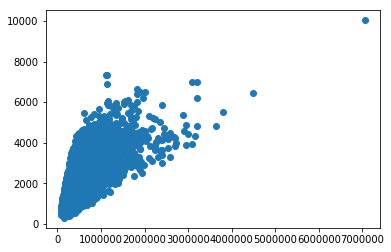

In [22]:
plt.scatter(df.price,y=df.sqft_living)

This indicate that correlation do exists and it is only the existence of the missing values in one or more columns among the three that produced the above exceptions

To be able to impute the missing values based on our inference, it is necessary that for all records, no more than one column of the three columns should be missing

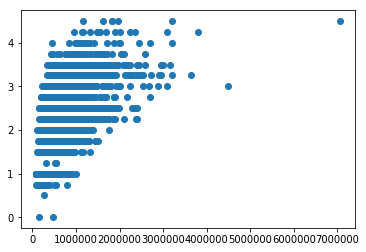

In [18]:
plt.scatter(x=df.price,y=df.bathrooms)

In [19]:
df['living_transformed'] = np.log(df.sqft_living)

/Users/boyuzhang/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


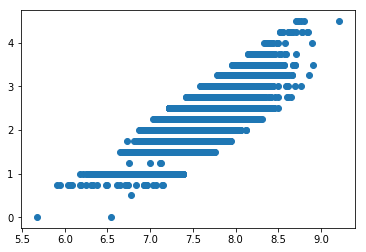

In [20]:
plt.scatter(x=df.living_transformed,y=df.bathrooms);

In [21]:
df['above_transfromed'] =  np.log(df.sqft_above)

/Users/boyuzhang/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


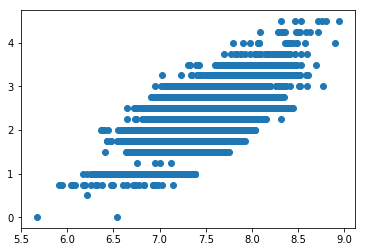

In [23]:
plt.scatter(x=df.above_transfromed,y=df.bathrooms);

()